## Imports

In [8]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [9]:
diabetPath = "./DiabetesDataNormalized.txt"
T = np.loadtxt(diabetPath, delimiter=" ", skiprows=1)
y = T[:, 10]
X = T[:, :10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

M = X

## 2 Examine Bias and Variance for the OLS:

> (a) Investigate the unbiasedness of OLS using simulated data as follows.

>> (i) Create a random matrix ${\bf X}$ consisting of three random variables which are NID, with $X ∼ N ({\bf 0}, {\bf I})$ and sample 10 observations from each.

>> (ii) Create the true regression parameters $β_{true} = [1, 2, 3]^T$.

>> (iii) Create the response y by the linear model ${\bf y} = {\bf X}β + {\bf ε}$. Make sure the errors ε are homoscedastic and zero-mean $ε ∼ N(0,σ^2)$, where $σ^2$ denotes the noise level in the simulated data.

>> (iv) Estimate the regression coefficients $β$ from this data

In [10]:
# Create a function that takes X and beta_true as parameters and returns an estimate of the betas by simulating observed variables
def estimate_betas(X, beta_true, sigma):
    """

    Parameters:
    X (nXp matrix): feature matrix used for simulation
    true_betas (array): array of ture betas
    sigma (float): standard deviation of the error term

    Returns:
    true_betas: the estimated betas

    """
    # Simulate observed data using the created freature matrix
    y = X @ beta_true + np.random.normal(0, sigma, n)

    # Estimate of beta
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta


# define true betas, n and p, and sigma
n = 10
p = 3
# Create a feature matrix either using np.random.normal or np.rand.randn
X = np.random.normal(0, 1, (10, 3))
beta_true = np.array([1, 2, 3])
sigma = 0.5
beta = estimate_betas(X, beta_true, sigma)
print(f"Estimated betas:{beta}")

Estimated betas:[0.97809937 1.8692494  3.02885283]


>> (v) Repeat steps (iii)-(iv) 100 times.

In [11]:
sigma = 0.1  # noise level
m = 100  # number of experiments
betas = np.zeros((p, m))  # all variable estimates
# call the method you just created 100 times and save the estimated betas
for i in range(m):
    betas[:, i] = estimate_betas(X, beta_true, sigma)

>> (vi) Use meaningful plots to investigate bias and variance for the model. Experiment with different noise levels $σ^2$. 

Mean of True Betas: 2.0
Standard Deviation of True Betas: 0.816496580927726


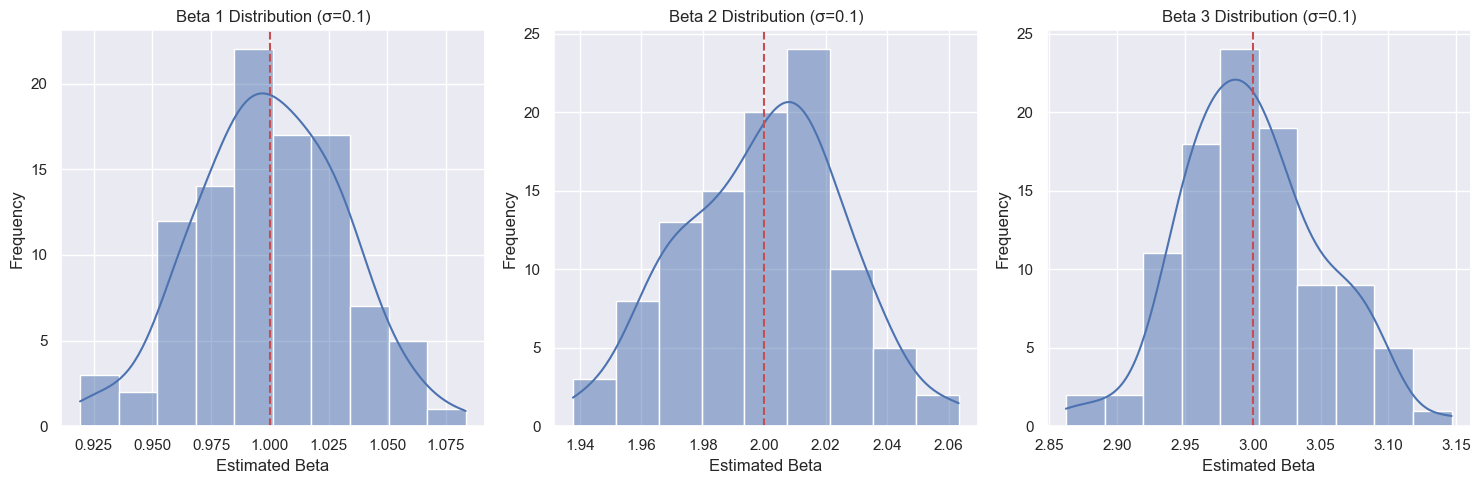

Noise Level (σ=0.1):
Mean of Estimated Betas: [0.99993207 1.9997438  2.99996089]
Standard Deviation of Estimated Betas: [0.03095462 0.02570536 0.05064631]




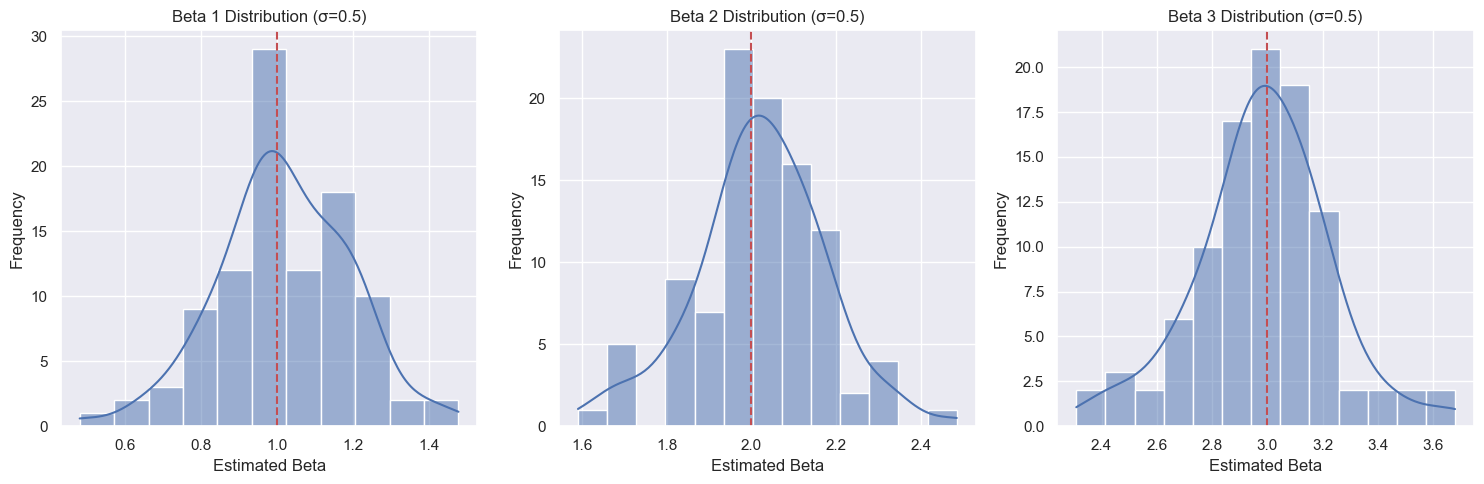

Noise Level (σ=0.5):
Mean of Estimated Betas: [1.01809528 2.0214768  2.98492305]
Standard Deviation of Estimated Betas: [0.1720842  0.15304902 0.24126025]




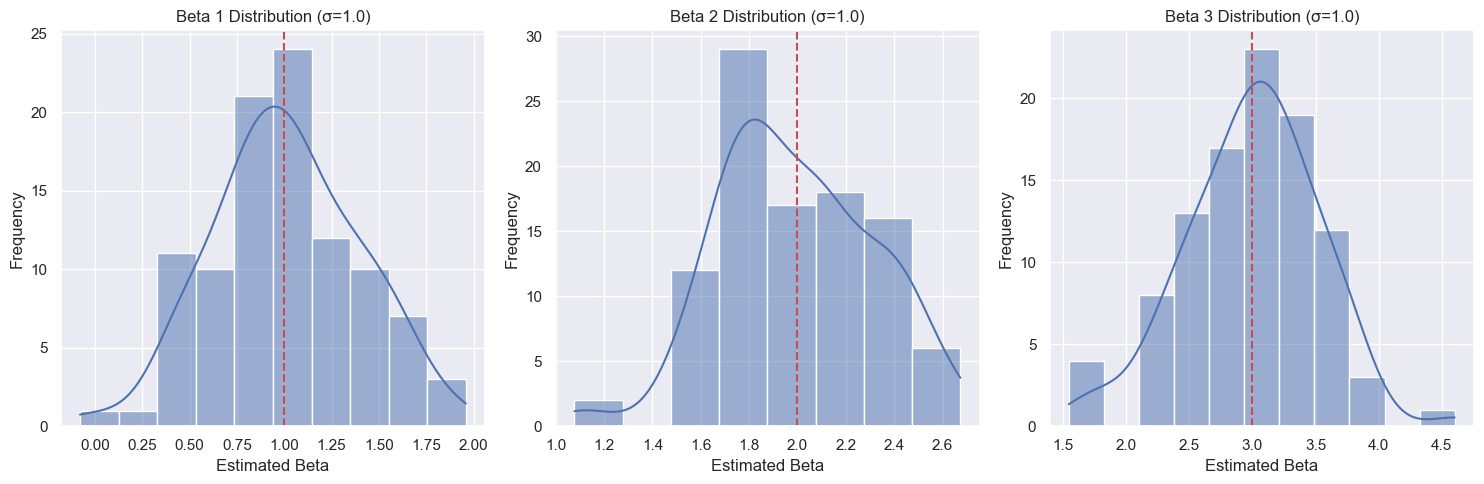

Noise Level (σ=1.0):
Mean of Estimated Betas: [1.00985623 1.99311247 2.99835583]
Standard Deviation of Estimated Betas: [0.38387683 0.31704377 0.52284533]




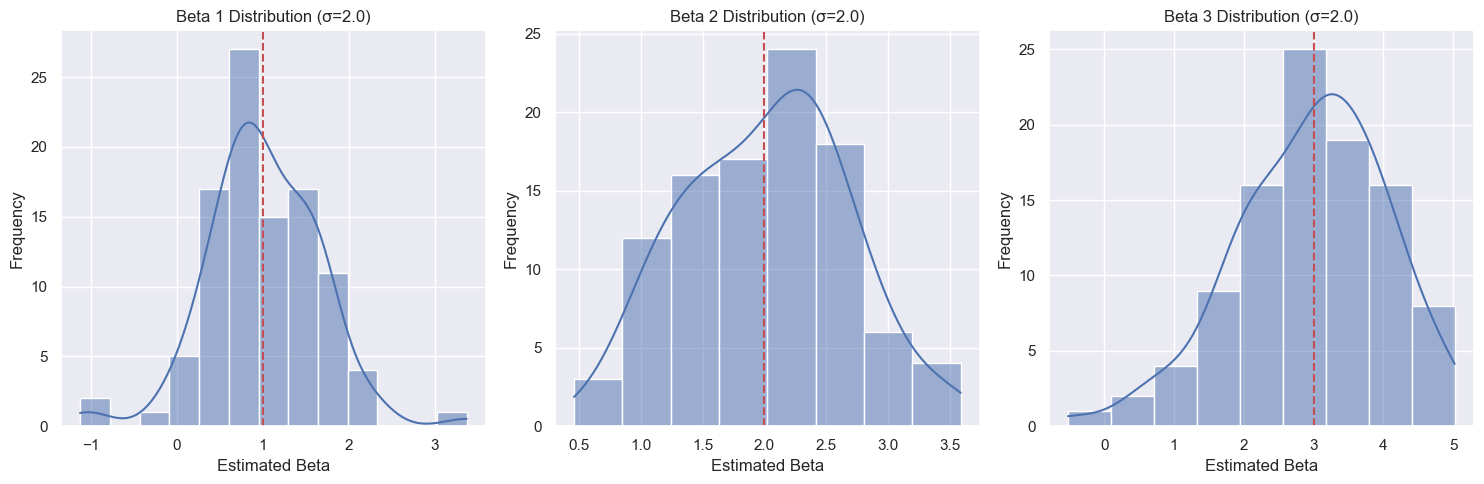

Noise Level (σ=2.0):
Mean of Estimated Betas: [1.00850528 2.00966108 2.95922442]
Standard Deviation of Estimated Betas: [0.65208618 0.66055977 1.06831088]




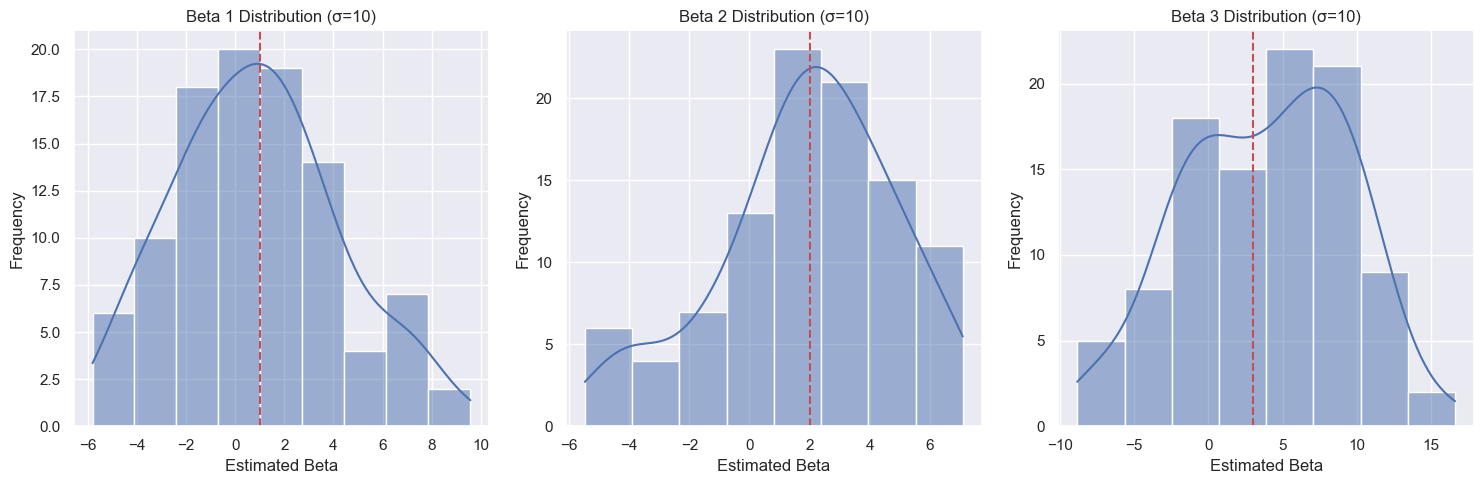

Noise Level (σ=10):
Mean of Estimated Betas: [0.88580009 1.89924845 3.9137637 ]
Standard Deviation of Estimated Betas: [3.29659065 2.90390642 5.48025864]




In [14]:
# Function to plot the distribution of estimated betas
def plot_beta_distribution(betas, beta_true, sigma):
    fig, axes = plt.subplots(1, p, figsize=(15, 5))
    for j in range(p):
        sns.histplot(betas[j, :], kde=True, ax=axes[j])
        axes[j].axvline(beta_true[j], color="r", linestyle="--")
        axes[j].set_title(f"Beta {j+1} Distribution (σ={sigma})")
        axes[j].set_xlabel("Estimated Beta")
        axes[j].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# Plot the distribution of estimated betas for the current noise level
# plot_beta_distribution(betas, beta_true, sigma)

mean_true_betas = np.mean(beta_true)
std_true_betas = np.std(beta_true)
print(f"Mean of True Betas: {mean_true_betas}")
print(f"Standard Deviation of True Betas: {std_true_betas}")

# Experiment with different noise levels
noise_levels = [0.1, 0.5, 1.0, 2.0, 10]
for sigma in noise_levels:
    betas = np.zeros((p, m))
    for i in range(m):
        betas[:, i] = estimate_betas(X, beta_true, sigma)
    plot_beta_distribution(betas, beta_true, sigma)
    mean_betas = np.mean(betas, axis=1)
    std_betas = np.std(betas, axis=1)
    print(f"Noise Level (σ={sigma}):")
    print(f"Mean of Estimated Betas: {mean_betas}")
    print(f"Standard Deviation of Estimated Betas: {std_betas}")
    print("\n")

What does bias and variance mean?

Are the parameter estimates unbiased? 

What happens when you change the noise level?


Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a much simpler model. Variance refers to the error introduced by the model's sensitivity to small fluctuations in the training set. To determine if the parameter estimates are unbiased, we can compare the mean of the estimated betas to the true betas. If the mean of the estimated betas is close to the true betas, then the estimates are unbiased. In our experiments, the mean of the estimated betas is close to the true betas, indicating that the parameter estimates are unbiased. When the noise level increases, the variance of the estimated betas also increases. This means that the estimates become more spread out and less precise.